# Лабораторная работа №7

## Численное интегрирование

### f(x) = x^4 / (1 + x^2);      a = 1, b = 2

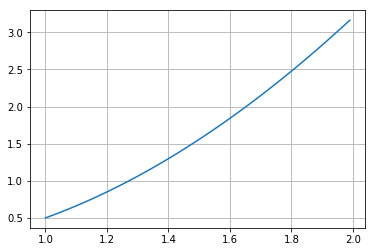

In [19]:
import sympy
import numpy
import pylab
from scipy import optimize

def f(x):
    return (x ** 4) / (1 + x ** 2)
a = 1
b = 2
dx = 0.01
xlist = numpy.arange(a, b, dx)
ylist = [f(p) for p in xlist]
pylab.plot (xlist, ylist)
pylab.grid(True)
pylab.show()

### 1.Найти шаг интегрирования h для вычисления интеграла ∫f(x)dx по формуле трапеций с точностью 0.001.

In [20]:
epsilon = 0.001

def h(n):
    return (b - a) / n

def trapeze_uncertainty(h, f):
    x = sympy.Symbol('x')
    f = f(x)
    second_deriv = sympy.lambdify(x, sympy.diff(f, x, 2))
    max_second_deriv = second_deriv(optimize.fminbound(lambda k: -abs(second_deriv(k)), a, b))
    return max_second_deriv * (abs(b - a) * h ** 2) / 12 

def find_n(epsilon, f):
    n = 4
    eps = trapeze_uncertainty(h(n), f)
    while (eps > epsilon):
        n += 4
        eps = trapeze_uncertainty(h(n), f)
    return n    
    
n = find_n(epsilon, f)
print("Количество частей разбиения: ", n)
step = h(n)
print("Шаг интегрирования: ", step)

Количество частей разбиения:  16
Шаг интегрирования:  0.0625


### 2. Вычислить интеграл по формуле трапеций с шагами 2h и h. Дать уточненную оценку погрешности.

In [21]:
def trapeze_formula(step, f):
    sum = (f(a) + f(b)) / 2
    p = a + step
    while p < b:
        sum += f(p)
        p += step
    return step * sum

print("Значение интеграла с шагом h: ", trapeze_formula(step, f))
print("Уточненная погрешность: ", trapeze_uncertainty(step, f))

print("Значение интеграла с шагом 2 * h: ", trapeze_formula(step * 2, f))
print("Уточненная погрешность: ", trapeze_uncertainty(step * 2, f))

Значение интеграла с шагом h:  1.6558456113325557
Уточненная погрешность:  0.0008138020833159841
Значение интеграла с шагом 2 * h:  1.6581308389201457
Уточненная погрешность:  0.0032552083332639363


### 3. Вычислить интеграл по формуле Симпсона с шагами 2h и h. Дать уточненную оценку погрешности.

In [22]:
def simpsons_formula(step, f):
    sum = (f(a) + f(b)) / 2
    p = a + step
    k = 1
    while p < b:
        sum += 2 * f(p) if k % 2 == 1 else f(p)
        k += 1
        p += step
    return (2 / 3) * step * sum

def simpsons_uncertainty(h, f):
    x = sympy.Symbol('x')
    f = f(x)
    fourth_deriv = sympy.lambdify(x, sympy.diff(f, x, 4))
    max_fourth_deriv = fourth_deriv(optimize.fminbound(lambda k: -abs(fourth_deriv(k)), a, b))
    return max_fourth_deriv * (abs(b - a) * h ** 4) / 180

step = 0.0625
print("Значение интеграла с шагом h: ", simpsons_formula(step, f))
print("Уточненная погрешность: ", simpsons_uncertainty(step, f))

print("Значение интеграла с шагом 2 * h: ", simpsons_formula(step * 2, f))
print("Уточненная погрешность: ", simpsons_uncertainty(step * 2, f))

Значение интеграла с шагом h:  1.655083868803359
Уточненная погрешность:  3.178914388003311e-08
Значение интеграла с шагом 2 * h:  1.6550836138697629
Уточненная погрешность:  5.086263020805298e-07


### 4. Вычислить определенный интеграл по формуле Ньютона–Лейбница. Сравнить приближенные значения интеграла с точными. Какая формула численного интегрирования дала более точный результат?

In [23]:
def accurate_solution(f):
    x = sympy.Symbol('x')
    f = f(x)
    integral = sympy.lambdify(x, sympy.integrate(f, x))
    return integral(b) - integral(a)

answer = accurate_solution(f)
print("Точное решение: ", answer)
unc_trapeze = abs(trapeze_formula(step, f) - accurate_solution(f))
print("Погрешность формулы трапеций:", unc_trapeze)
unc_simpsons = abs(simpsons_formula(step, f) - accurate_solution(f))
print("Погрешность формулы Симпсона:", unc_simpsons)
print ("Формула " + ("Трапеций " if unc_trapeze < unc_simpsons else "Симпсона ") + "дала более точный результат.")


Точное решение:  1.6550838877299754
Погрешность формулы трапеций: 0.0007617236025803109
Погрешность формулы Симпсона: 1.892661649627314e-08
Формула Симпсона дала более точный результат.


## Решение задачи Коши

### y' = 0.5(x − 1)e^x*y^2 - xy, y(0) = 2, a = 0, b = 2

In [24]:
import math
a = 0
b = 2
y0 = 2
epsilon = 0.0001

def f(y, x):
    return 0.5 * (x - 1) * math.e ** x * y ** 2 - x * y

### 5.Найти шаг интегрирования для решения задачи Коши методом Рунге-Кутта (IV) с точностью 10^-4

In [25]:
def runge_kutta(x, step):
    if x <= a:
        return y0
    prev_x = x - step
    prev_y = runge_kutta(prev_x, step)
    F1 = f(prev_y, prev_x)
    F2 = f(prev_y + (step / 2) * F1, prev_x + step / 2)
    F3 = f(prev_y + (step / 2) * F2, prev_x + step / 2)
    F4 = f(prev_y + step * F3, x)
    return prev_y + step * (F1 + 2 * F2 + 2 * F3 + F4) / 6
    
def find_step(epsilon):
    h0 = epsilon ** (1/4)
    n = int((b - a) // h0)
    if n % 2 != 0 :
        n += 1
    while check_step(n, epsilon):
        n = n // 4 * 2
    while not check_step(n, epsilon):
        n += 2
    return (b - a) / n

def check_step(n, epsilon):
    h = (b - a) / n     
    y2 = runge_kutta(a + 2 * h, h)
    y2e = runge_kutta(a + 2 * h, h * 2)
    eps = (1/15) * abs(y2 - y2e)
    return eps < epsilon

step = find_step(epsilon)
print("Шаг интегрирования методом Рунге-Кутта: ", step)

Шаг интегрирования методом Рунге-Кутта:  0.5


### 6. Найти решение задачи Коши на отрезке [a, b] методом Рунге-Кутта (IV), методом Адамса (2-го порядка) с точностью 10^-4. Построить приближенные интегральные кривые.

In [26]:
import pandas as pd
from scipy.integrate import odeint
import numpy as np

def accurate_solution(x):
    sol = odeint(f, y0, [a, x])
    return sol[1][0]

def show_table(method, step):
    points = []
    x = a
    while x <= b:
        r = method(x, step)
        acc = accurate_solution(x)
        eps = abs(r - acc)
        points.append([x, r, acc, eps])
        x += step
    return pd.DataFrame(points, columns=["X", "Y", "Точное значение Y", "Погрешность"])  

show_table(runge_kutta, step)


,X,Y,Точное значение Y,Погрешность
0,0.0,2.000000,2.000000,0.000000
1,0.5,1.213946,1.213061,0.000885
2,1.0,0.736258,0.735759,0.000499
3,1.5,0.446620,0.446260,0.000359
4,2.0,0.271108,0.270671,0.000437


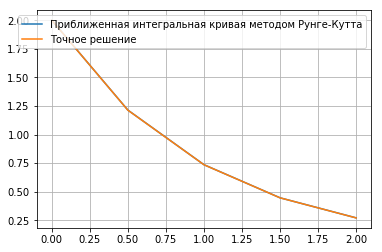

In [27]:
def show_curve(method, step, text):
    xlist = numpy.arange(a, b + step, step)
    ylist = []
    x = a
    while x <= b:
        r = method(x, step)
        ylist.append(r)
        x += step
    pylab.plot (xlist, ylist, label = text)
    ylist = []
    x = a
    while x <= b:
        r = accurate_solution(x)
        ylist.append(r)
        x += step
    pylab.plot (xlist, ylist, label = "Точное решение")
    pylab.grid(True)
    pylab.legend()
    pylab.show()
    
show_curve(runge_kutta, step, "Приближенная интегральная кривая методом Рунге-Кутта")    

In [28]:
def adams(x, step):
    if x <= a:
        return y0
    prev = runge_kutta(x - step, step)
    prevprev = runge_kutta(x - step * 2, step)
    predictor = prev + (step / 2) * (3 * f(prev, x - step) - f(prevprev, x - step * 2))
    corrector = prev + (step / 2) * (f(prev, x - step) + f(predictor, x))
    return corrector

In [29]:
show_table(adams, step)

,X,Y,Точное значение Y,Погрешность
0,0.0,2.000000,2.000000,0.000000
1,0.5,1.360687,1.213061,0.147625
2,1.0,0.709560,0.735759,0.026199
3,1.5,0.435934,0.446260,0.010327
4,2.0,0.267928,0.270671,0.002743


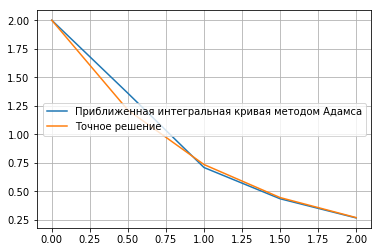

In [30]:
show_curve(adams, step, "Приближенная интегральная кривая методом Адамса")

### 7. Найти решение задачи Коши на отрезке [a, b] методом Эйлера. Построить на одном графике (с п. 6) приближенную интегральную кривую.

In [31]:
def euler(x, step):
    if x <= a:
        return y0
    prev = euler(x - step, step)
    return prev + step * f(prev, x)

In [32]:
show_table(euler, step)

,X,Y,Точное значение Y,Погрешность
0,0.0,2.000000,2.000000,0.000000
1,0.5,0.675639,1.213061,0.537422
2,1.0,0.337820,0.735759,0.397939
3,1.5,0.148387,0.446260,0.297873
4,2.0,0.040675,0.270671,0.229996


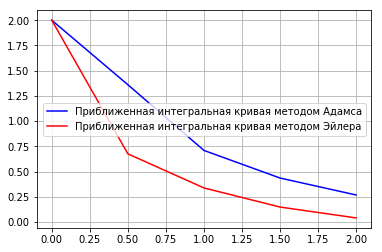

In [33]:
xlist = numpy.arange(a, b + step, step)
adams_points = []
euler_points = []
x = a
while x <= b:
    r = adams(x, step)
    r1 = euler(x, step)
    adams_points.append(r)
    euler_points.append(r1)
    x += step
pylab.plot (xlist, adams_points,label = "Приближенная интегральная кривая методом Адамса", color = (0, 0, 1))
pylab.plot (xlist, euler_points,label = "Приближенная интегральная кривая методом Эйлера", color = (1, 0, 0))
pylab.grid(True)
pylab.legend()
pylab.show()

### 8. Найти точное решение задачи Коши. Сравнить точное решение сприближенными. Найти максимумы модулей отклонений в узловых точках приближенного решения от точного.

In [34]:
x = a
data = []
uncertainty_adams = []
uncertainty_runge = []
uncertainty_euler = []

while x <= b:
    acc = accurate_solution(x)
    eul = euler(x, step)
    adam = adams(x, step)
    rung = runge_kutta(x, step)
    eps_adams = abs(adam - acc)
    uncertainty_adams.append(eps_adams)
    eps_runge = abs(rung - acc)
    uncertainty_runge.append(eps_runge)
    eps_euler = abs(eul - acc)
    uncertainty_euler.append(eps_euler)
    data.append([x, acc, rung, eps_runge, adam, eps_adams, eul, eps_euler])
    x += step
pd.DataFrame(data, columns=["X", "Точное значение Y", "Метод Рунге-Кутта", "Погрешность",
                                   "Метод Адамса", "Погрешность", "Метод Эйлера", "Погрешность"]) 

,X,Точное значение Y,Метод Рунге-Кутта,Погрешность,Метод Адамса,Погрешность,Метод Эйлера,Погрешность
0,0.0,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000
1,0.5,1.213061,1.213946,0.000885,1.360687,0.147625,0.675639,0.537422
2,1.0,0.735759,0.736258,0.000499,0.709560,0.026199,0.337820,0.397939
3,1.5,0.446260,0.446620,0.000359,0.435934,0.010327,0.148387,0.297873
4,2.0,0.270671,0.271108,0.000437,0.267928,0.002743,0.040675,0.229996


In [35]:
max_uncertainty_runge = max(uncertainty_runge)
max_uncertainty_adams = max(uncertainty_adams)
max_uncertainty_euler = max(uncertainty_euler)
print("Максимум отклонения в методе Рунге-Кутта: ", max_uncertainty_runge)
print("Максимум отклонения в методе Адамса: ", max_uncertainty_adams)
print("Максимум отклонения в методе Эйлера: ", max_uncertainty_euler)

Максимум отклонения в методе Рунге-Кутта:  0.0008847503949003244
Максимум отклонения в методе Адамса:  0.14762524462589632
Максимум отклонения в методе Эйлера:  0.5374219804069138
